In [ ]:
import pandas as pd
import numpy as np
from scipy.io import arff

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,classification_report

In [ ]:
d=pd.read_csv("/content/drive/MyDrive/Data mining/mammographic_masses_updated.csv")
d

,Unnamed: 0,BI RADS,Age,Shape,Margin,Density,Severity
0,0,5.0,67.0,3.0,5.0,3.0,1
1,1,4.0,43.0,1.0,1.0,3.0,1
2,2,5.0,58.0,4.0,5.0,3.0,1
3,3,4.0,28.0,1.0,1.0,3.0,0
4,4,5.0,74.0,1.0,5.0,3.0,1
...,...,...,...,...,...,...,...
956,956,4.0,47.0,2.0,1.0,3.0,0
957,957,4.0,56.0,4.0,5.0,3.0,1
958,958,4.0,64.0,4.0,5.0,3.0,0
959,959,5.0,66.0,4.0,5.0,3.0,1


In [ ]:
d.isna().sum()

Unnamed: 0    0
BI RADS       0
Age           0
Shape         0
Margin        0
Density       0
Severity      0
dtype: int64

In [ ]:
d=d.drop(columns='Unnamed: 0')

In [ ]:
d['BI RADS'].replace('?',np.nan,inplace=True)
d['BI RADS'].replace(np.nan,d['BI RADS'].median() ,inplace=True)


In [ ]:
d['Age'].replace('?',np.nan,inplace=True)
d['Age'].replace(np.nan,d['Age'].median() ,inplace=True)

In [ ]:
d['Shape'].replace('?',np.nan,inplace=True)
d['Shape'].replace(np.nan,d['Shape'].median() ,inplace=True)

In [ ]:
d['Margin'].replace('?',np.nan,inplace=True)
d['Margin'].replace(np.nan,d['Margin'].median() ,inplace=True)

In [ ]:
d['Density'].replace('?',np.nan,inplace=True)
d['Density'].replace(np.nan,d['Density'].median() ,inplace=True)

In [ ]:
d.to_csv("/content/drive/MyDrive/Data mining/mammographic_masses_updated.csv")

In [ ]:
d.dtypes

BI RADS     float64
Age         float64
Shape       float64
Margin      float64
Density     float64
Severity      int64
dtype: object

In [ ]:
d.shape

(961, 6)

In [ ]:
d[d.duplicated()==True]

,BI RADS,Age,Shape,Margin,Density,Severity
52,4.0,23.0,1.0,1.0,3.0,0
68,4.0,45.0,2.0,1.0,3.0,0
95,5.0,54.0,4.0,4.0,3.0,1
105,4.0,54.0,1.0,1.0,3.0,0
116,4.0,45.0,2.0,1.0,3.0,0
...,...,...,...,...,...,...
955,4.0,52.0,4.0,4.0,3.0,1
956,4.0,47.0,2.0,1.0,3.0,0
958,4.0,64.0,4.0,5.0,3.0,0
959,5.0,66.0,4.0,5.0,3.0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ba5a42130>,
      dtype=object)

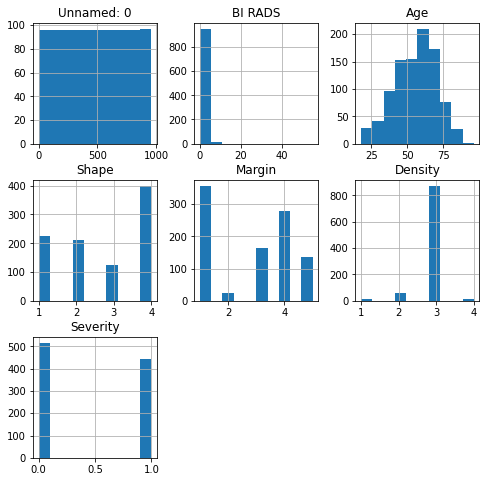

In [ ]:
d.hist(figsize=(8,8))

In [ ]:
#Splitting the data into dependant and independant variables

x=d[['BI RADS','Age','Shape','Margin','Density']]
y=d[['Severity']]

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

**Decision Tree Classifier**

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?

Accuracy: 84.08304498269896
f1 score: 81.30081300813009
Precision: 89.28571428571429
Recall: 74.6268656716418


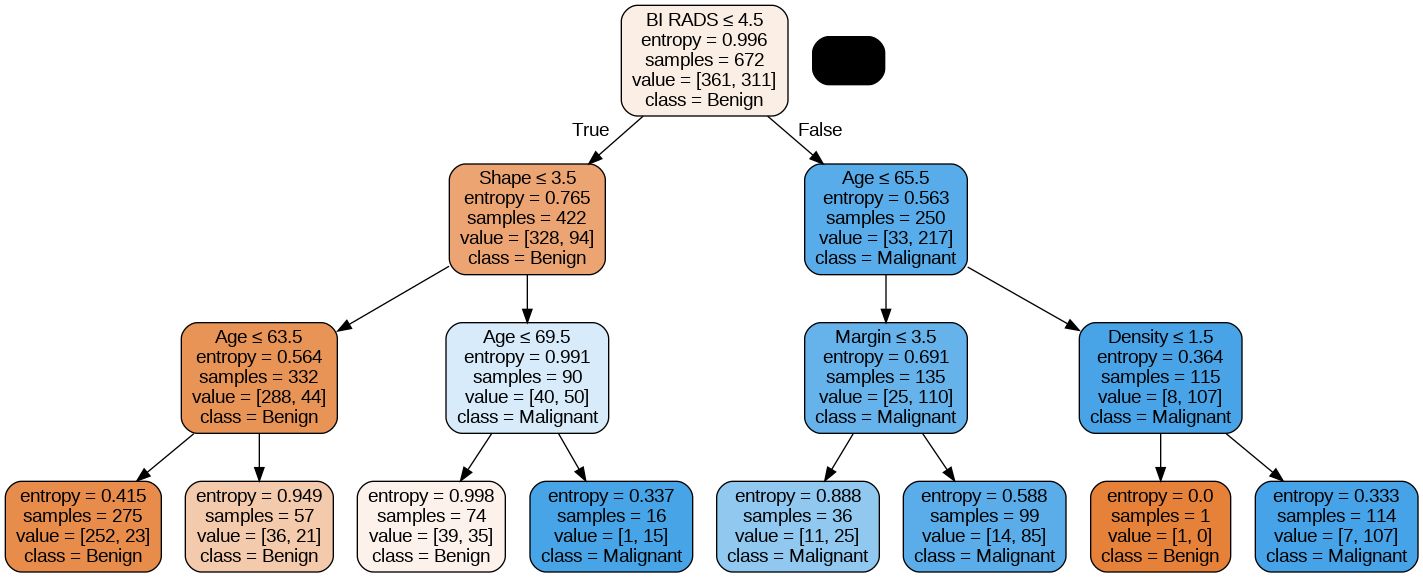

In [ ]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
import pydotplus

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",100*metrics.accuracy_score(y_test, y_pred))
print('f1 score:',100*f1_score(y_test,y_pred))
print('Precision:',100*precision_score(y_test,y_pred))
print('Recall:',100*recall_score(y_test,y_pred))


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = ['BI RADS','Age','Shape','Margin','Density'],class_names={0:'Benign',1:'Malignant'})
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('ForestFire.png')
Image(graph.create_png())

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression (solver = "liblinear")

logreg.fit (x_train , y_train)
y_pred = logreg.predict(x_test)
y_predicted_proba = logreg.predict_proba(x_test)

print("Accuracy:",100*metrics.accuracy_score(y_test, y_pred))
print('f1 score:',100*f1_score(y_test,y_pred))
print('Precision:',100*precision_score(y_test,y_pred))
print('Recall:',100*recall_score(y_test,y_pred))

Accuracy: 82.00692041522491
f1 score: 81.15942028985506
Precision: 78.87323943661971
Recall: 83.5820895522388


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, random_state = 100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",100*metrics.accuracy_score(y_test, y_pred))
print('f1 score:',100*f1_score(y_test,y_pred))
print('Precision:',100*precision_score(y_test,y_pred))
print('Recall:',100*recall_score(y_test,y_pred))

Accuracy: 77.50865051903114
f1 score: 75.47169811320754
Precision: 76.33587786259542
Recall: 74.6268656716418


<ipython-input-42-3740d559cff3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


**SVM Classifier**

In [ ]:
#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_test = svm.predict(x_test)
print("Accuracy:",100*metrics.accuracy_score(y_test, y_pred))
print('f1 score:',100*f1_score(y_test,y_pred))
print('Precision:',100*precision_score(y_test,y_pred))
print('Recall:',100*recall_score(y_test,y_pred))

Accuracy: 77.85467128027682
f1 score: 76.11940298507463
Precision: 77.86259541984732
Recall: 74.45255474452554


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_pred,y_test)
print("Accuracy:",100*metrics.accuracy_score(y_test, y_pred))
print('f1 score:',100*f1_score(y_test,y_pred))
print('Precision:',100*precision_score(y_test,y_pred))
print('Recall:',100*recall_score(y_test,y_pred))

Accuracy: 82.69896193771626
f1 score: 82.26950354609929
Precision: 80.0
Recall: 84.67153284671532


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
model = keras.Sequential([
    keras.layers.Dense(30,input_shape=(5,),activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))
y_pred = (model.predict(x_test) > 0.5)
acc1=history.history['accuracy']
accuracy=accuracy_score(y_pred,y_test)

print("Accuracy:",100*metrics.accuracy_score(y_test, y_pred))
print('f1 score:',100*f1_score(y_test,y_pred))
print('Precision:',100*precision_score(y_test,y_pred))
print('Recall:',100*recall_score(y_test,y_pred))

Epoch 1/20
2/2 [==============================] - 1s 178ms/step - loss: 0.5188 - accuracy: 0.4628 - val_loss: 0.4905 - val_accuracy: 0.4740
Epoch 2/20
2/2 [==============================] - 0s 35ms/step - loss: 0.5047 - accuracy: 0.4628 - val_loss: 0.4613 - val_accuracy: 0.4740
Epoch 3/20
2/2 [==============================] - 0s 35ms/step - loss: 0.4784 - accuracy: 0.4628 - val_loss: 0.4119 - val_accuracy: 0.4740
Epoch 4/20
2/2 [==============================] - 0s 33ms/step - loss: 0.4367 - accuracy: 0.4628 - val_loss: 0.3404 - val_accuracy: 0.4913
Epoch 5/20
2/2 [==============================] - 0s 35ms/step - loss: 0.3672 - accuracy: 0.4747 - val_loss: 0.2725 - val_accuracy: 0.5882
Epoch 6/20
2/2 [==============================] - 0s 36ms/step - loss: 0.3002 - accuracy: 0.4881 - val_loss: 0.2756 - val_accuracy: 0.4048
Epoch 7/20
2/2 [==============================] - 0s 35ms/step - loss: 0.2923 - accuracy: 0.4271 - val_loss: 0.3207 - val_accuracy: 0.5260
Epoch 8/20
2/2 [==========

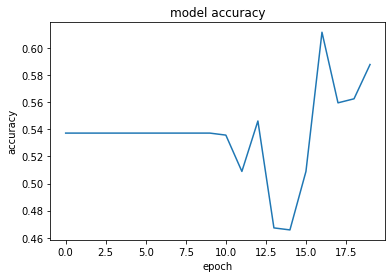

In [ ]:
plt.plot(acc1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()